<a href="https://colab.research.google.com/github/djs21905/Machine-Learning/blob/master/SmithAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest






In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


bank = pd.read_csv("https://gist.githubusercontent.com/djs21905/14ce577835f30ce43b01c118fd8be153/raw/6894e74597aa0b2691d3b0416a9647ba69e03cb1/bank.csv", sep = ";")

bank.head()

bank.dropna()

#convert no/yes to an integer value

convert_to_binary = {'no' : 0, 'yes' : 1}

default = bank["default"].map(convert_to_binary)
housing = bank["housing"].map(convert_to_binary)
loan = bank["loan"].map(convert_to_binary)
response = bank["response"].map(convert_to_binary)

bank.info()

model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T


model_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
response     4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


(4521, 4)

## Logistic Regression Model

In [0]:
from sklearn.model_selection import train_test_split

# Split our data into 3 binary features and one response variable
x, y = model_data[:,0:3], model_data[:,3]


# Split our data into 80/20 train/test split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.1 , random_state = 42)

In [0]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(C = 100)
log_classifier.fit(x_train, y_train)

# Returns the final prediction either 0 or 1 
log_classifier.predict(x_test)




# confirming that the distrubtion for test and train is ok 
train1 = len(np.where(y_train == 1)[0])/len(y_train) * 100
train0 = len(np.where(y_train == 0)[0])/len(y_train) * 100
test1 = len(np.where(y_test == 1)[0])/len(y_test) * 100
test0 = len(np.where(y_test == 0)[0])/len(y_test) * 100


statement = """Percent of 1's in training set {}%\nPercent of 0's in training set {}%\nPercent of 1's in test set {}%\nPercent of 0's in test set {}%"""
print(statement.format(train1, train0, test1, test0))

# Returns the probability of 0 and 1 respectively
log_classifier.predict_proba(x_test)

Percent of 1's in training set 11.651917404129794%
Percent of 0's in training set 88.34808259587021%
Percent of 1's in test set 10.375275938189846%
Percent of 0's in test set 89.62472406181016%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.8890872 , 0.1109128 ],
       [0.83385917, 0.16614083],
       [0.83385917, 0.16614083],
       [0.9077264 , 0.0922736 ],
       [0.83385917, 0.16614083],
       [0.83385917, 0.16614083],
       [0.9077264 , 0.0922736 ],
       [0.83385917, 0.16614083],
       [0.83385917, 0.16614083],
       [0.83385917, 0.16614083],
       [0.83385917, 0.16614083],
       [0.9077264 , 0.0922736 ],
       [0.9077264 , 0.0922736 ],
       [0.83385917, 0.16614083],
       [0.9077264 , 0.0922736 ],
       [0.9077264 , 0.0922736 ],
       [0.83385917, 0.16614083],
       [0.83385917, 0.16614083],
       [0.9077264 , 0.0922736 ],
       [0.9077264 , 0.0922736 ],
       [0.9077264 , 0.0922736 ],
       [0.95188701, 0.04811299],
       [0.83385917, 0.16614083],
       [0.83385917, 0.16614083],
       [0.9077264 , 0.0922736 ],
       [0.9077264 , 0.0922736 ],
       [0.9077264 , 0.0922736 ],
       [0.83385917, 0.16614083],
       [0.9077264 , 0.0922736 ],
       [0.9077264 , 0.0922736 ],
       [0.

In [0]:
from sklearn.model_selection import cross_val_score
# Evaluating the model using cross validation 

cross_val = cross_val_score(log_classifier, x_train, y_train, cv=3, scoring="accuracy")
# False sense of accuracy because approximately 90 percent of the responses are 0 
# and only 10 % are actually 1.  Accuracy due to chance. 

cross_val

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.88348083, 0.88348083, 0.88348083])

In [0]:
from sklearn.model_selection import cross_val_predict
from collections import Counter

# Performs cross validation but returns each instances response values 0 or 1 
# TN= 3193, FP= 0, FN= 423, TP= 0
y_train_pred = cross_val_predict(log_classifier, x_train, y_train, cv=3)

Counter(y_train_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Counter({0: 4068})

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[3594,    0],
       [ 474,    0]])

In [0]:
from sklearn.metrics import precision_score, recall_score
prec = recall_score(y_train, y_train_pred) # TP / TP + FN  
rec = precision_score(y_train, y_train_pred)# TP/ TP + FP 

# Both equations evaluate to 0
print("Precision: {}\nRecall: {}".format(prec,rec))

log_classifier.score(x_train, y_train)
log_classifier.score(x_test, y_test)

Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8962472406181016

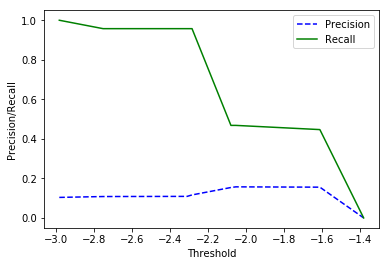

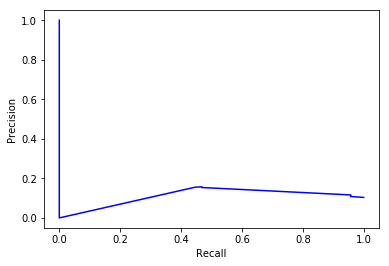

In [0]:
from sklearn.metrics import precision_recall_curve

y_test_decision_scores = log_classifier.decision_function(x_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_decision_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.ylabel("Precision/Recall")
  plt.xlabel("Threshold")
  plt.legend()
  plt.show()

def plot_precision_vs_recall(precisions, recalls): 
  plt.plot(recalls, precisions, "b-", label="Precision") 
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.show()


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plot_precision_vs_recall(precisions,recalls)


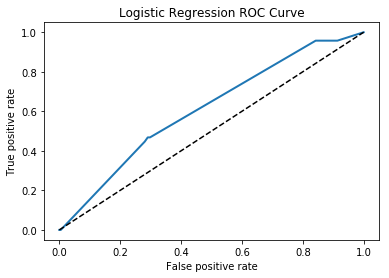

AUC score of 0.6103395870453832
Precision of 0.0
Recall of 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[406,   0],
       [ 47,   0]])

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_test_pred = log_classifier.predict_proba(x_test)
y_test_pred_answer = log_classifier.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(fpr, tpr, linewidth=2, label= None) 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

auc = roc_auc_score(y_test, y_test_pred[:,1])
prec = precision_score(y_test,y_test_pred_answer)
rec = recall_score(y_test,y_test_pred_answer)

str1 = """AUC score of {}\nPrecision of {}\nRecall of {}"""
print(str1.format(auc, prec, rec))
confusion_matrix(y_test, y_test_pred_answer)

In [0]:
# NOTE PLEASE DISREGARD THIS CELL.  STILL WORKING ON ADJUSTING THRESHOLD.
# In this cell im working on changing the balance of precision/recall
# I was looking into lowering the threshold value to increase recall
# with hopes of increasing the number of True Positive responses.
threshold_20_precision = thresholds[np.argmax(precisions >= 0.16)] 
#y_test_decision_scores = log_classifier.decision_function(x_test)

y_test_pred_20= (y_test_decision_scores >= threshold_20_precision)
y_test_pred_20

#ROC Curve
fpr_adj, tpr_adj, thresholds_adj = roc_curve(y_train, y_train_pred_20)
plt.plot(fpr_adj, tpr_adj, linewidth=2, label= None) 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression ROC Curve Lower Threshold")
plt.show()

# Values after lowering the threshold 
auc_adj = roc_auc_score(y_test, y_test_pred_20)
prec_adj = precision_score(y_test,y_test_pred_20)
rec_adj = recall_score(y_test,y_test_pred_20)

str2 = """AUC score of {}\nPrecision of {}\nRecall of {}"""
print("Adjusted Threshold Test Summary:")
print(str2.format(auc_adj, prec_adj, rec_adj))


#confusion_matrix(y_train, y_train_pred_20)

confusion_matrix(y_test,y_test_pred_20)

#Evaluates test data with threshold change


NameError: ignored

# Naive Bayes Bernoulli 

In [0]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

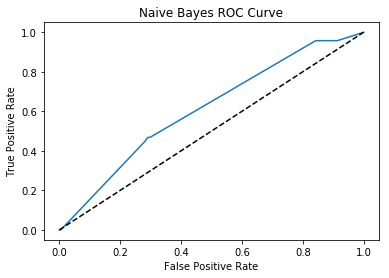

0.6103395870453832

In [0]:
y_test_pred2 = clf.predict_proba(x_test)

fpr_bayes, tpr_bayes, thresholds_bayes = roc_curve(y_test, y_test_pred2[:,1])



plt.plot(fpr_bayes, tpr_bayes)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


roc_auc_score(y_test, y_test_pred2[:,1])


## Conclusion

In [0]:
bayes_auc = roc_auc_score(y_test, y_test_pred2[:,1])
auc

str3 = "The Logistic AUC score is {}\nThe Bayes AUC score is {}"

print(str3.format(auc, bayes_auc))

The Logistic AUC score is 0.6103395870453832
The Bayes AUC score is 0.6103395870453832


In [0]:
cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")